# MMCN Projet - 2024-2025 - Sujet 3 : Variante 3D du modèle de FitzHugh-Nagumo

In [1]:
%matplotlib widget
from math import *
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

### Simuler le système (1) pour c=-0.32

In [3]:
# Valeurs de paramètres
c=-0.32
mu=0.01

# ODEs
def FHN3D(t, S):
    v=S[0]
    w=S[1]
    u=S[2]
    dvdt=v-v**3/3-w
    dwdt=-u+v-1.3/(1+np.exp((c-w)/0.05))
    dudt=mu*(-0.4-v)
    return np.array([dvdt,dwdt,dudt])

In [4]:
# Calculer une solution
S0=np.array([0.1, 0.1, 0.2])
t_span = (0, 1000)  # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Time points to evaluate
sol = solve_ivp(FHN3D, t_span, S0, method='RK45', args=(), t_eval=t_eval, rtol=1e-08)

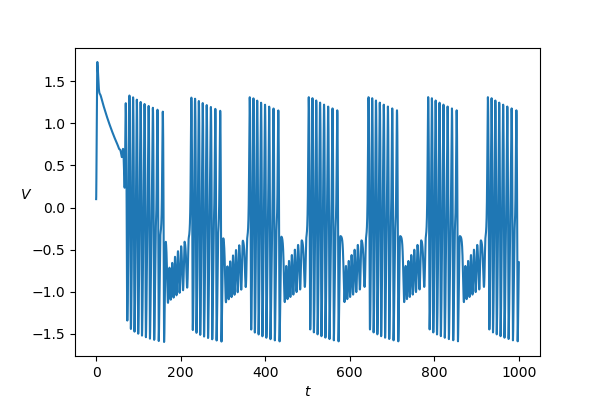

In [18]:
# Tracer la solution: V en fonction du temps
plt.figure(figsize=(6, 4))
plt.plot(sol.t,sol.y[0])
plt.xlabel('$t$')
plt.ylabel('$V$',rotation=0)
plt.show()

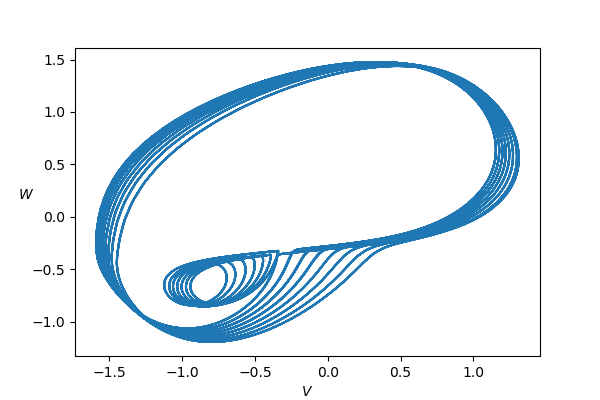

In [20]:
# Tracer la solution: (V,W)
plt.figure(figsize=(6, 4))
plt.plot(sol.y[0][4000:10000],sol.y[1][4000:10000])
plt.xlabel('$V$')
plt.ylabel('$W$',rotation=0)
plt.show()

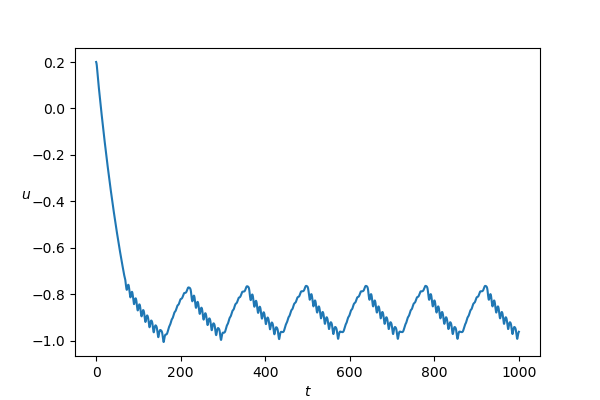

In [22]:
# Tracer la solution: u en fonction du temps
plt.figure(figsize=(6, 4))
plt.plot(sol.t,sol.y[2])
plt.xlabel('$t$')
plt.ylabel('$u$',rotation=0)
plt.show()

In [24]:
toggle = False # if false, solve ODE; if true, find equilibria
labels = [0, 1]
    
def generer_portrait_phase(f, xrange, yrange, tmax):
    def rhs(t, x): return f(x[0], x[1])

    def plotdf(rhs, xrange, yrange, grid, ax):
        xn = np.linspace(xrange[0], xrange[1], 400)
        yn = np.linspace(yrange[0], yrange[1], 400)
        Xn, Yn = np.meshgrid(xn, yn)
        DXn, DYn = rhs(Xn, Yn)
        x = np.linspace(xrange[0], xrange[1], grid[0])
        y = np.linspace(yrange[0], yrange[1], grid[1])
        X, Y = np.meshgrid(x, y)
        DX, DY = rhs(X, Y)
        M = (np.hypot(DX, DY))
        M[M==0] = 1.0
        DX = DX/M
        DY = DY/M
        ax.quiver(X, Y, DX, DY, color='tab:green', angles='xy', alpha=0.5)
        ax.contour(Xn, Yn, DXn, levels=[0], colors='r', linestyles='dashed')
        ax.contour(Xn, Yn, DYn, levels=[0], colors='b', linestyles='dashed')
    
        

    def cross_top(t, x): return yrange[1]+0.5 - x[1]
    def cross_bot(t, x): return yrange[0]-0.5 - x[1]
    def cross_lef(t, x): return xrange[0]-0.5 - x[0]
    def cross_rig(t, x): return xrange[1]+0.5 - x[0]
    cross_top.terminal = True
    cross_bot.terminal = True
    cross_lef.terminal = True
    cross_rig.terminal = True
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    plt.subplots_adjust(bottom=0.2)
    button = plt.axes([0.2, 0.05, 0.57, 0.05])   # [left, bottom, width, height]
    labels[0] = button.text(0.05, 0.25, "Cliquer pour trouver les points stationnaires", fontsize=10)
    labels[1] = button.text(0.05, 0.25, "Cliquer pour simuler le système", fontsize=10)
    labels[0].set_visible(True)
    labels[1].set_visible(False)
    button.set(xticks=[], yticks=[])
    button.set_facecolor('tab:green')

    ax.set_title("Portrait de phase")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.grid(True)
    plotdf(f, xrange, yrange, [11, 11], ax)
    plt.show()

    def solve_ode(t, x):
        solf = solve_ivp(rhs, (0,  tmax), x, t_eval=np.linspace(t,  tmax, 10000), 
                         events=[cross_top, cross_bot, cross_lef, cross_rig],atol=1.e-10, rtol=1.e-8)
        solb = solve_ivp(rhs, (0, -tmax), x, t_eval=np.linspace(t, -tmax, 10000), 
                         events=[cross_top, cross_bot, cross_lef, cross_rig],atol=1.e-10, rtol=1.e-8)
        ax.scatter(x[0], x[1], color='tab:olive', zorder=2)
        ax.plot(solf.y[0], solf.y[1], color='tab:blue', zorder=1)
        ax.plot(solb.y[0], solb.y[1], color='tab:blue', linestyle='dashed', zorder=1)

    def on_click(event):
        global toggle, labels
        if event.button is MouseButton.LEFT:
            if event.inaxes == button:
                labels[toggle].set_visible(False)
                toggle = not toggle
                labels[toggle].set_visible(True)
            if event.inaxes == ax:
                x = event.xdata
                y = event.ydata
                if x>xrange[0] and x<xrange[1] and y>yrange[0] and y<yrange[1]:
                    if toggle:
                        equilibrium = fsolve(lambda x: f(x[0], x[1]), [x, y])
                        xeq=equilibrium[0]
                        yeq=equilibrium[1]
                        ax.scatter(equilibrium[0], equilibrium[1], s=70, color='tab:red', zorder=2)
                        ax.set_title('Equilibre: x='+ str(xeq)+', y='+str(yeq))
                    else: solve_ode(0, [x, y])
            fig.canvas.draw()

    plt.connect('button_press_event', on_click)

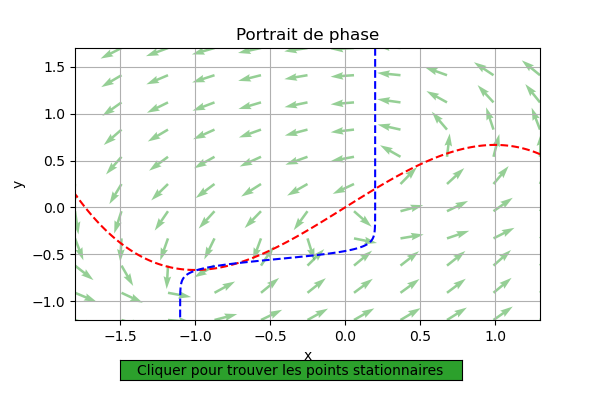

In [26]:
# Valeurs du paramètre z
c=-0.55
u=-1.099

# EDOs
def FHN(v,w):
    return [v-v**3/3-w,-u+v-1.3/(1+np.exp((c-w)/0.05))]

generer_portrait_phase(FHN, xrange=[-1.8, 1.3], yrange=[-1.2, 1.7], tmax=50)

## Code supplémentaire

## question a)

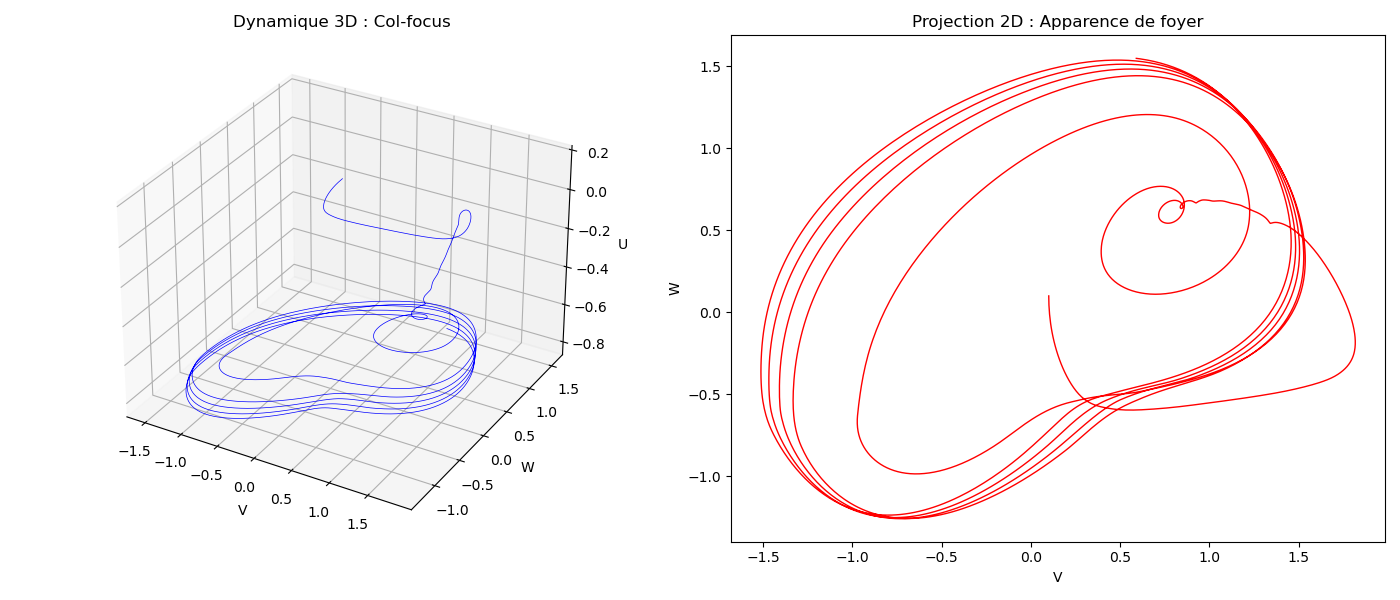

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Paramètres
c = -0.55
mu = 0.01

def FHN3D(t, S):
    v, w, u = S
    return [v - v**3/3 - w, 
            -u + v - 1.3 / (1 + np.exp((c - w)/0.05)), 
            mu * (-0.4 - v)]

# Simulation 3D
sol = solve_ivp(FHN3D, [0, 100], [0.1, 0.1, 0.2], t_eval=np.linspace(0, 100, 5000))

# Figure 3D
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2], 'b-', lw=0.5)
ax1.set_xlabel('V')
ax1.set_ylabel('W')
ax1.set_zlabel('U')
ax1.set_title('Dynamique 3D : Col-focus')

# Figure 2D (projection V-W)
ax2 = fig.add_subplot(122)
ax2.plot(sol.y[0], sol.y[1], 'r-', lw=1)
ax2.set_xlabel('V')
ax2.set_ylabel('W')
ax2.set_title('Projection 2D : Apparence de foyer')
plt.tight_layout()
plt.show()


## question b) :

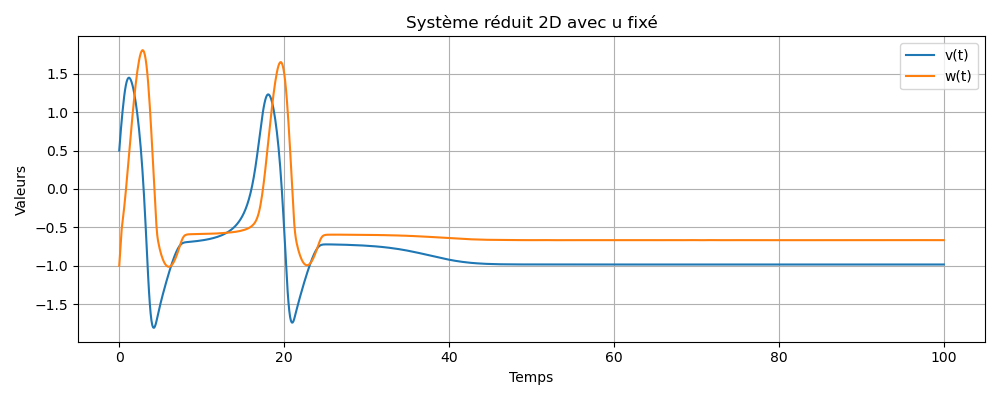

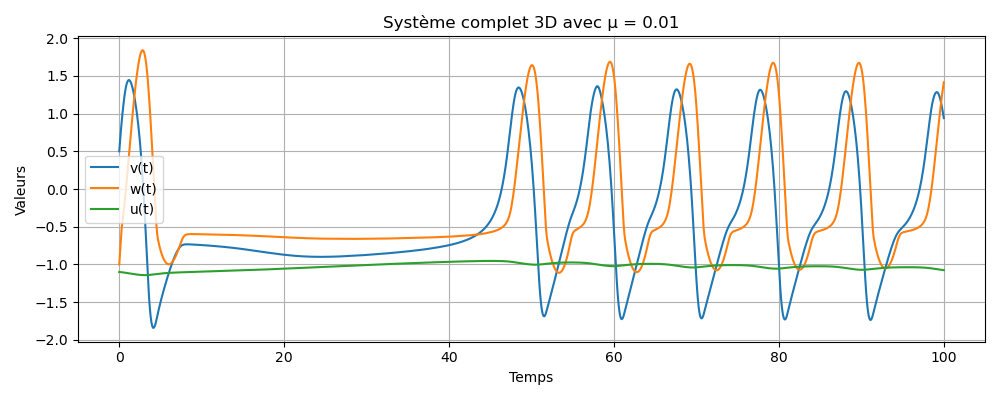

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres
c = -0.55
u_fixed = -1.099

# Système réduit (v, w)
def reduced_system(t, y):
    v, w = y
    dvdt = v - (v**3) / 3 - w
    dwdt = -u_fixed + v - (1.3 / (1 + np.exp((c - w) / 0.05)))
    return [dvdt, dwdt]

# Conditions initiales
y0 = [0.5, -1]

# Intégration
t_span = (0, 100)
sol = solve_ivp(reduced_system, t_span, y0, t_eval=np.linspace(*t_span, 1000))

# Tracé
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0], label='v(t)')
plt.plot(sol.t, sol.y[1], label='w(t)')
plt.title("Système réduit 2D avec u fixé")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Paramètre µ lent
mu = 0.01

# Système complet (v, w, u)
def full_system(t, y):
    v, w, u = y
    dvdt = v - (v**3) / 3 - w
    dwdt = -u + v - (1.3 / (1 + np.exp((c - w) / 0.05)))
    dudt = mu * (-0.4 - v)
    return [dvdt, dwdt, dudt]

# Conditions initiales
y0 = [0.5, -1, -1.099]  # même u qu’avant

# Intégration
sol3d = solve_ivp(full_system, t_span, y0, t_eval=np.linspace(*t_span, 1000))

# Tracé
plt.figure(figsize=(10, 4))
plt.plot(sol3d.t, sol3d.y[0], label='v(t)')
plt.plot(sol3d.t, sol3d.y[1], label='w(t)')
plt.plot(sol3d.t, sol3d.y[2], label='u(t)')
plt.title("Système complet 3D avec µ = 0.01")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## question c)

In [43]:
def FHN_wrapper(X):
    return FHN(X[0], X[1]) # adaptation format numpy pour fsolve 
equilibre = fsolve(FHN_wrapper, [-0.6, -0.7])  # change init en fonction du point cherché 
print("Équilibre trouvé : V =", equilibre[0], ", W =", equilibre[1])

Équilibre trouvé : V = -0.7160248895033107 , W = -0.5936582306384229


## question d )

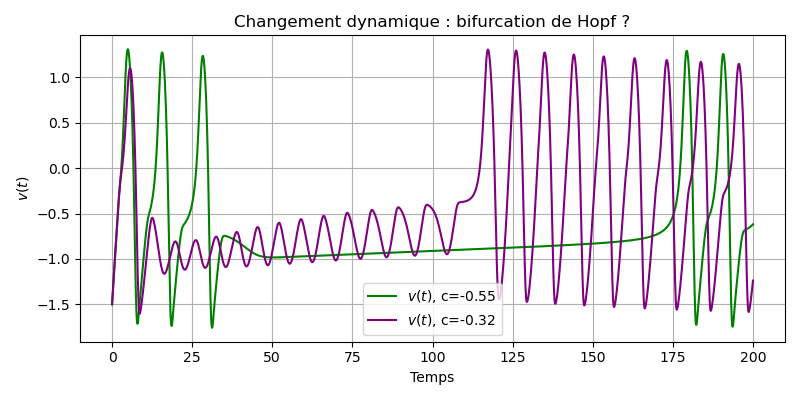

In [81]:
# Fonction pour le système complet (v,w,u)
def systeme_complet(t, Y, c_val):
    v, w, u = Y
    dv = v - v**3 / 3 - w
    dw = -u + v - 1.3 / (1 + np.exp((c_val - w) / 0.05))
    du = 0.01 * (c_val - 0.7 * v)
    return [dv, dw, du]

fig, ax = plt.subplots(figsize=(8, 4))
c_vals = [-0.55, -0.32]
colors = ['green', 'purple']

for i, c_val in enumerate(c_vals):
    sol = solve_ivp(lambda t, Y: systeme_complet(t, Y, c_val), (0, 200), [-1.5, -1, -1], max_step=0.1)
    ax.plot(sol.t, sol.y[0], label=f"$v(t)$, c={c_val}", color=colors[i])

ax.set_title("Changement dynamique : bifurcation de Hopf ?")
ax.set_xlabel("Temps")
ax.set_ylabel("$v(t)$")
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()
